In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# date_added ko datetime me convert karo
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [ ]:
#duration break karna.
df['duration_value'] = df['duration'].str.split(' ').str[0]
df['duration_type'] = df['duration'].str.split(' ').str[1]

In [ ]:
df['duration_value'] = df['duration_value'].astype('Int64')

In [ ]:
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
movies = df[df['type'] == "Movie"]
movies['duration_value'].mean()


np.float64(99.57718668407311)

In [ ]:
tv_shows = df[df['type'] == 'TV Show']

tv_shows['duration_value'].value_counts().head(10)

,count
duration_value,
1,1793
2,425
3,199
4,95
5,65
6,33
7,23
8,17
9,9


In [ ]:
df['director'] = df['director'].fillna('Unknown Director')
df['cast'] = df['cast'].fillna('Unknown Cast')
df['country'] = df['country'].fillna('Unknown Country')

In [ ]:
df['rating'].value_counts().head()

most_common_rating = df['rating'].mode()[0]
df['rating'] = df['rating'].fillna(most_common_rating)

In [ ]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

In [ ]:
df['duration'].value_counts().head()

most_common_duration = df['duration'].mode()[0]
df['duration'] = df['duration'].fillna(most_common_duration)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
genre_df = df.copy()
genre_df['lidted_in']= genre_df['listed_in'].str.split(',').explode('listed_in')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [ ]:
genre_df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


In [ ]:
#rating analysis
df['rating'].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [ ]:
#rating vs type
df.groupby(['rating','type']).size().unstack().fillna(0)

type,Movie,TV Show
rating,,
66 min,1.0,0.0
74 min,1.0,0.0
84 min,1.0,0.0
G,41.0,0.0
NC-17,3.0,0.0
NR,75.0,5.0
PG,287.0,0.0
PG-13,490.0,0.0
R,797.0,2.0


In [ ]:
# Basic Snapshot Metrics
total_titles = len(df)
total_movies = df[df['type'] == 'Movie'].shape[0]
total_tv = df[df['type'] == 'TV Show'].shape[0]
year_span = (df['release_year'].min(), df['release_year'].max())

print("Total Titles:", total_titles)
print("Total Movies:", total_movies)
print("Total TV Shows:", total_tv)
print("Content Year Span:", year_span)

Total Titles: 23754
Total Movies: 16873
Total TV Shows: 6881
Content Year Span: (1925, 2021)


In [ ]:
#visullization

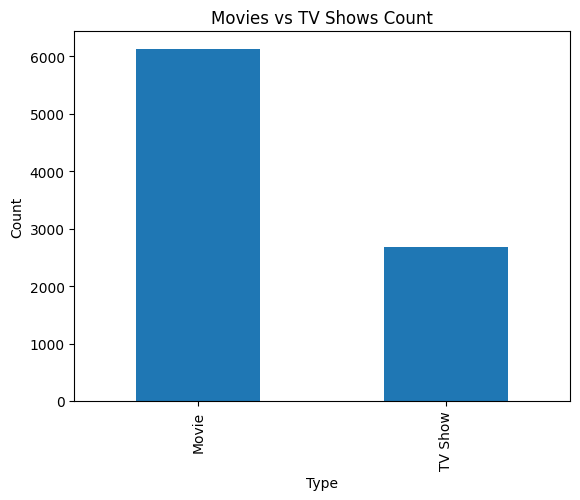

In [ ]:
#movies vs tv

df['type'].value_counts().plot(kind='bar')
plt.title("Movies vs TV Shows Count")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

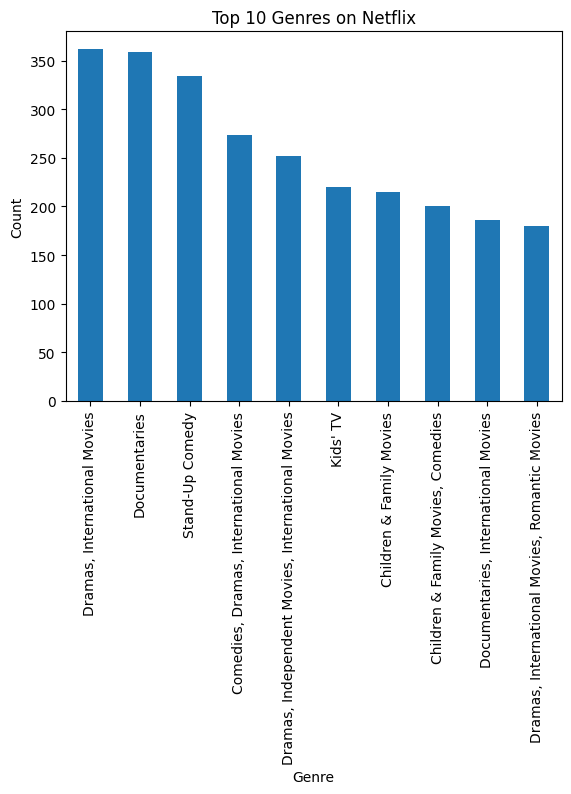

In [ ]:
genre_df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

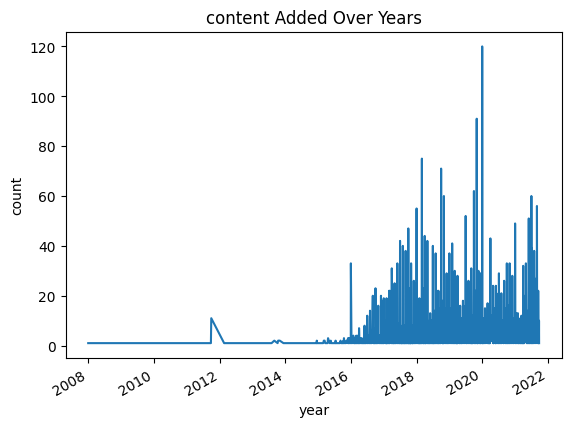

In [ ]:
df['date_added'].value_counts().sort_index().plot()
plt.title("content Added Over Years")
plt.xlabel('year')
plt.ylabel("count")
plt.show()


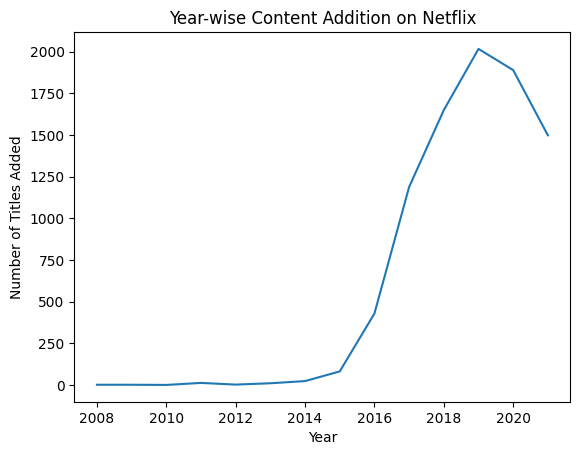

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].dt.year # use for show only year
yearly_count = df['date_added'].value_counts().sort_index()
plt.figure()
yearly_count.plot()

plt.title("Year-wise Content Addition on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")

plt.show()

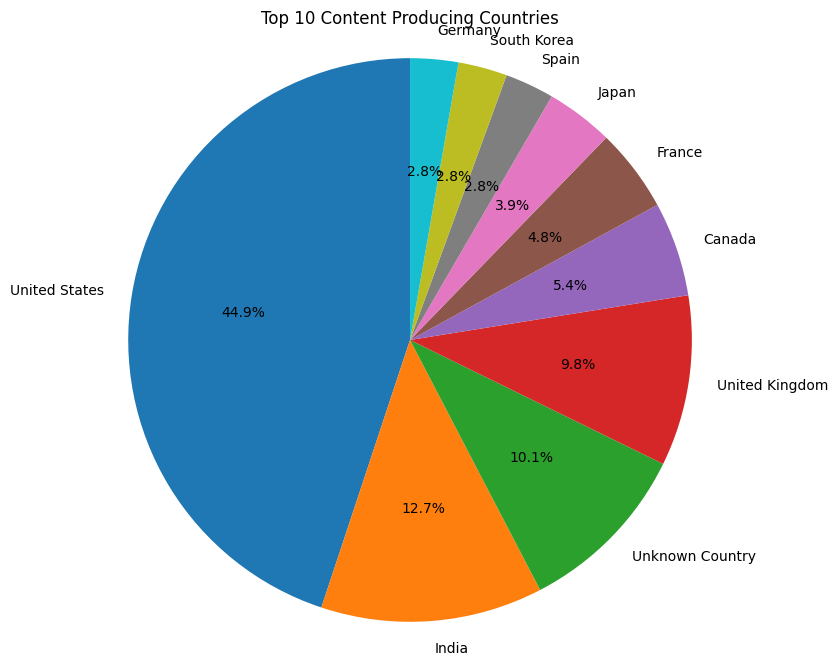

In [ ]:
#df['country'] = df['country'].fillna('Unknown')

# Split multiple countries into separate rows
df['country'] = df['country'].str.split(', ')
df = df.explode('country')

# Get Top 10 content producing countries
top_countries = df['country'].value_counts().head(10)

# Plot Pie Chart
plt.figure(figsize=(8,8))
plt.pie(top_countries.values,
        labels=top_countries.index,
        autopct='%1.1f%%',
        startangle=90)

plt.title("Top 10 Content Producing Countries")
plt.axis('equal')   # Makes pie perfectly circular
plt.show()

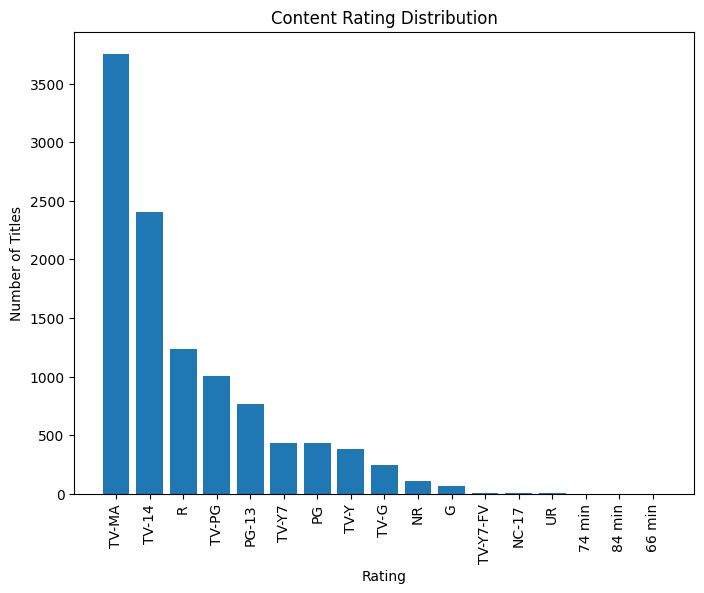

In [ ]:
# rating
rating_count = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(rating_count.index, rating_count.values)

plt.xticks(rotation=90)
plt.title("Content Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Titles")
plt.show()


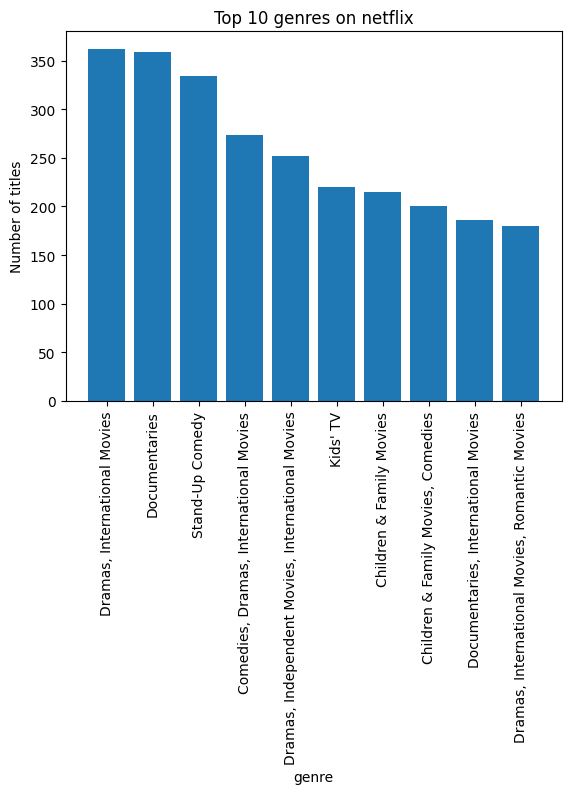

In [ ]:
top_genre= genre_df['listed_in'].value_counts().head(10)
plt.figure()
plt.bar(top_genre.index,top_genre.values)
plt.xticks(rotation=90)
plt.title("Top 10 genres on netflix")
plt.xlabel("genre")
plt.ylabel('Number of titles')
plt.show()

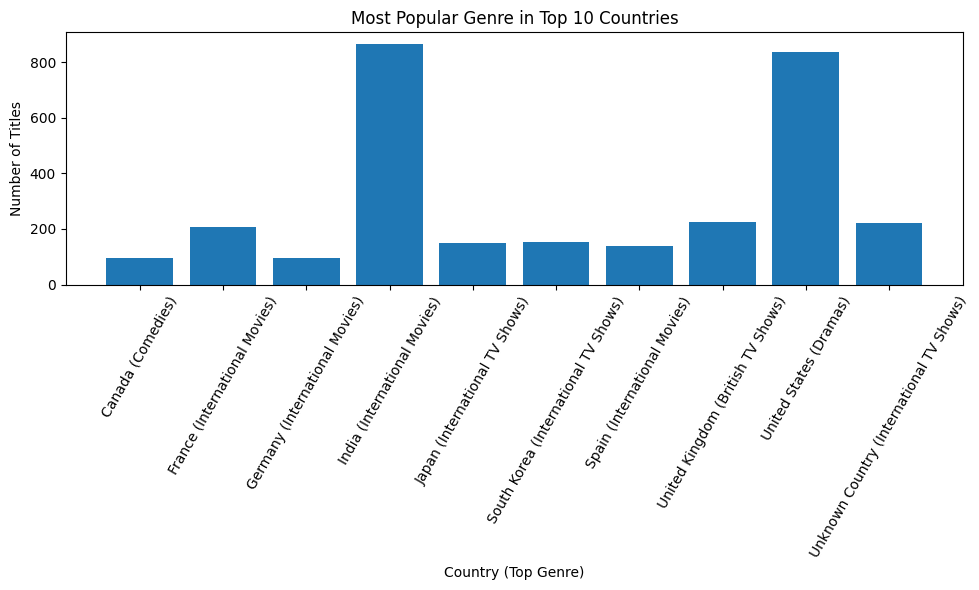

In [ ]:
df['country'] = df['country'].fillna('Unknown')

# Split multiple values
df['country'] = df['country'].str.split(', ')
df['listed_in'] = df['listed_in'].str.split(', ')

# Explode
df = df.explode('country')
df = df.explode('listed_in')

# Top 10 countries
top10 = df['country'].value_counts().head(10).index
df_top = df[df['country'].isin(top10)]

# Country + Genre count
country_genre = (
    df_top
    .groupby(['country', 'listed_in'])
    .size()
    .reset_index(name='count')
)

# Most popular genre per country
top_genre_country = country_genre.loc[
    country_genre.groupby('country')['count'].idxmax()
]

# Create label (Country + Genre)
top_genre_country['label'] = (
    top_genre_country['country'] +
    " (" +
    top_genre_country['listed_in'] +
    ")"
)

# Plot
plt.figure(figsize=(10,6))
plt.bar(top_genre_country['label'], top_genre_country['count'])

plt.xticks(rotation=60)
plt.title("Most Popular Genre in Top 10 Countries")
plt.xlabel("Country (Top Genre)")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()

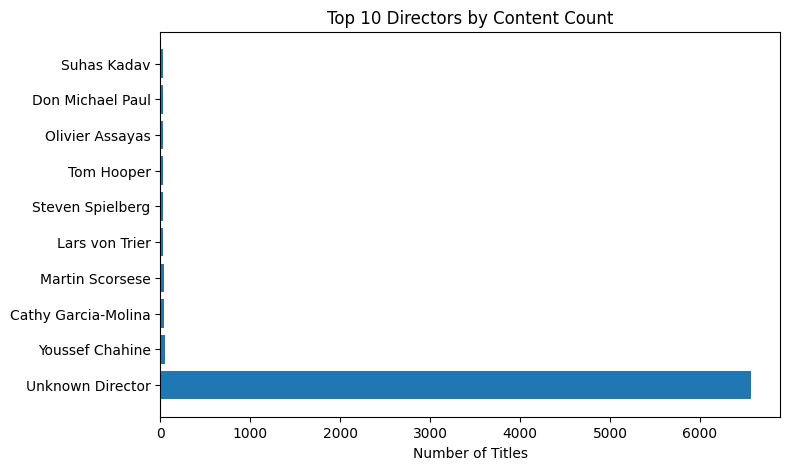

In [ ]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_directors.index, top_directors.values)
plt.title("Top 10 Directors by Content Count")
plt.xlabel("Number of Titles")
plt.show()

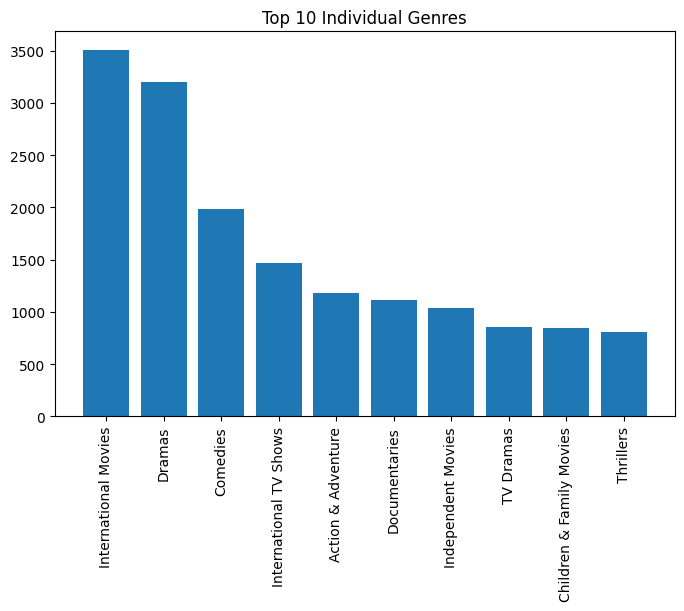

In [ ]:
genre_df = df.copy()
genre_df['listed_in'] = genre_df['listed_in'].str.split(',')
genre_df = genre_df.explode('listed_in')
genre_df['listed_in'] = genre_df['listed_in'].str.strip()

top_genres = genre_df['listed_in'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.bar(top_genres.index, top_genres.values)
plt.xticks(rotation=90)
plt.title("Top 10 Individual Genres")
plt.show()

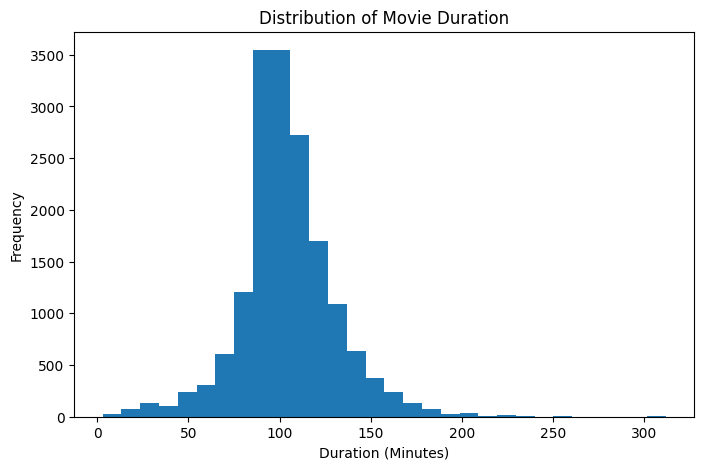

In [ ]:
movies = df[df['type']=='Movie']

plt.figure(figsize=(8,5))
plt.hist(movies['duration_value'].dropna(), bins=30)
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

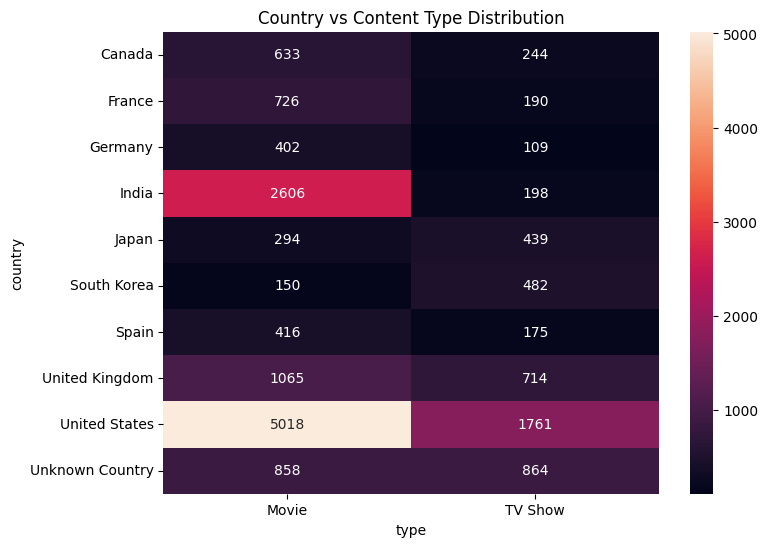

In [ ]:
top_countries = df['country'].value_counts().head(10).index

country_type = df[df['country'].isin(top_countries)]
pivot = pd.crosstab(country_type['country'], country_type['type'])

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt="d")
plt.title("Country vs Content Type Distribution")
plt.show()

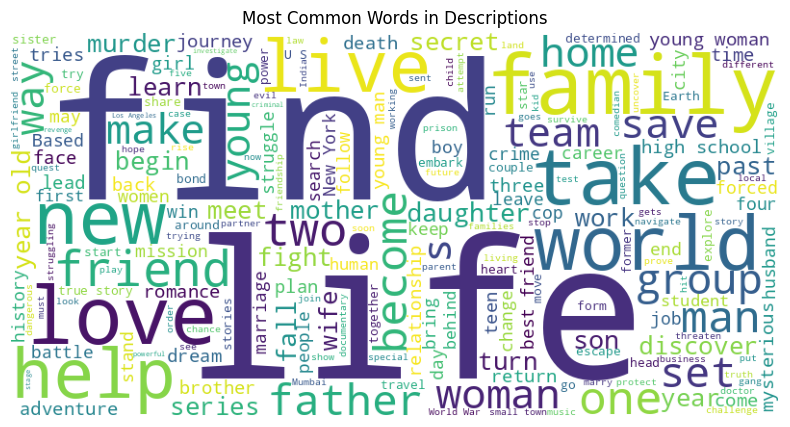

In [ ]:
from wordcloud import WordCloud

text = " ".join(df['description'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in Descriptions")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Simple feature selection
ml_df = df[['release_year','duration_value','type']].dropna()

le = LabelEncoder()
ml_df['type'] = le.fit_transform(ml_df['type'])

X = ml_df[['release_year','duration_value']]
y = ml_df['type']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = RandomForestClassifier()
model.fit(X_train,y_train)

print("Accuracy:", model.score(X_test,y_test))

Accuracy: 0.9985266259734793
